Practica de Regresion con dataset de cancer de mama

Usamos Decision Tree y SVR

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

cargamos los datos y sacamos las columnas que no necesitamos

In [118]:
data = pd.read_csv('breast-cancer.csv')

data = data.drop(columns=['id', 'diagnosis'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

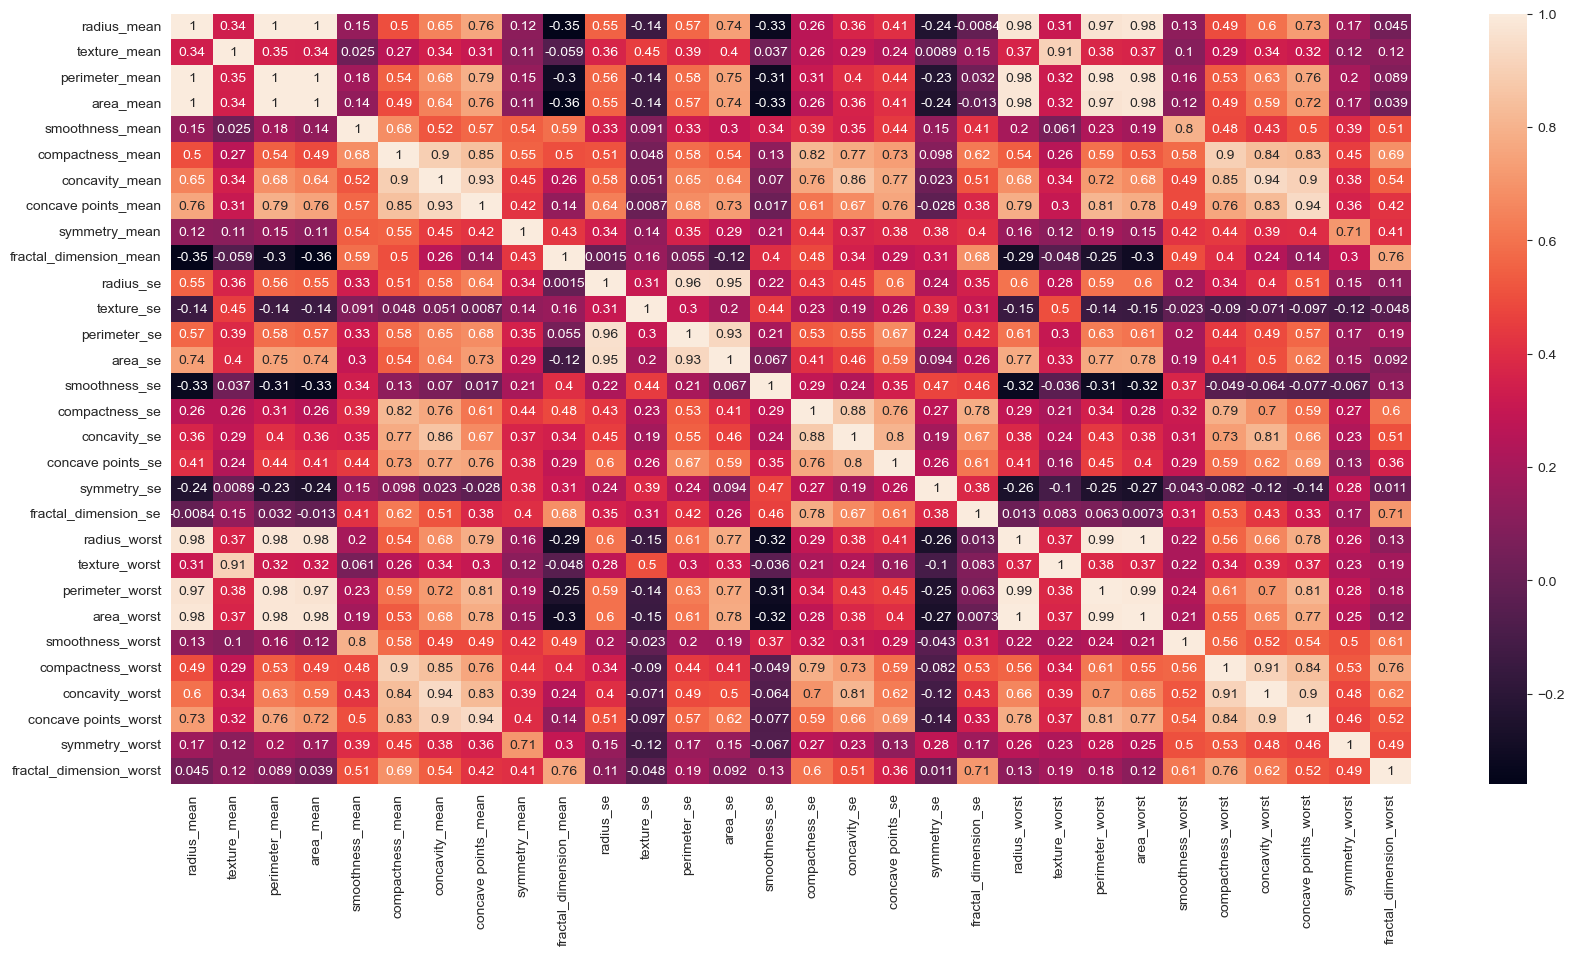

In [119]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(method="spearman"), annot=True)
plt.show()

In [120]:
y = data['radius_mean'].to_numpy()
X = data[['area_worst', 'perimeter_worst', 'smoothness_se', 'fractal_dimension_mean']].to_numpy()

# SVR

In [121]:
svr1 = SVR(C=100).fit(X, y)
svr2 = SVR(C=0.1).fit(X, y)
svr3 = SVR(C=0.01).fit(X, y)
svr4 = SVR(C=30).fit(X, y)

In [122]:
y_pred1 = svr1.predict(X)
y_pred2 = svr2.predict(X)
y_pred3 = svr3.predict(X)
y_pred4 = svr4.predict(X)

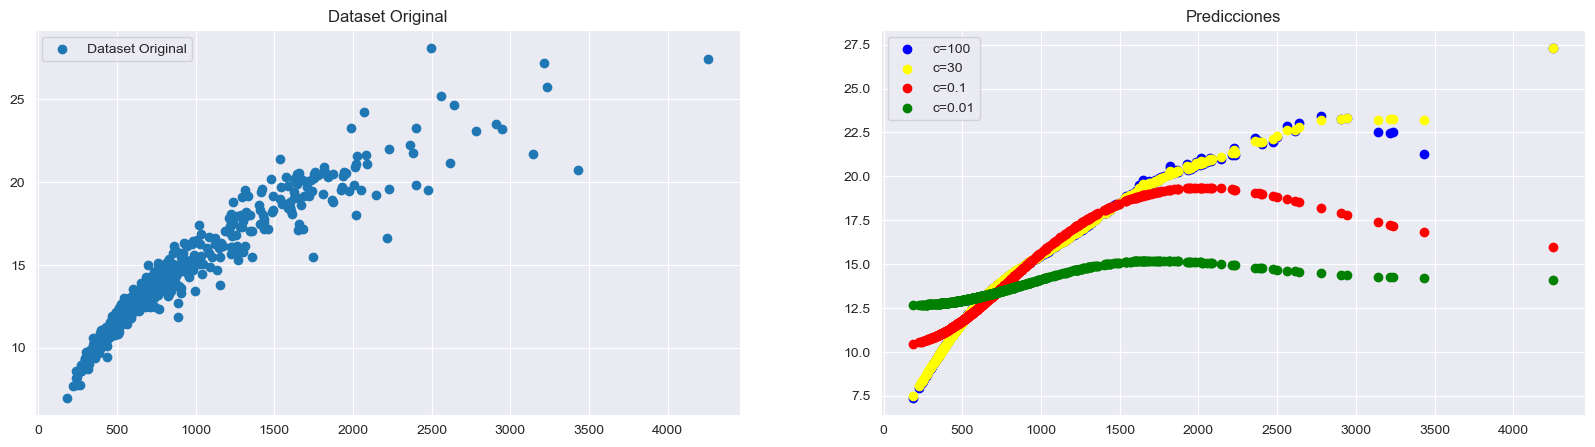

In [123]:
figs, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(X[:,0], y, label='Dataset Original')
axs[0].set_title('Dataset Original')
axs[0].legend()

axs[1].scatter(X[:,0], y_pred1, c='blue',label='c=100')
axs[1].scatter(X[:,0], y_pred4, c='yellow',label='c=30')
axs[1].scatter(X[:,0], y_pred2, c='red',label='c=0.1')
axs[1].scatter(X[:,0], y_pred3, c='green',label='c=0.01')
axs[1].legend()
axs[1].set_title('Predicciones')
plt.show()

In [124]:
from sklearn.model_selection import GridSearchCV

svr = SVR()

model = GridSearchCV(svr, param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}, cv=5)
model.fit(X, y)
print(model.best_params_)

{'C': 1, 'kernel': 'linear'}


# Decision Tree

In [125]:
dt1 = DecisionTreeRegressor(max_depth=3).fit(X, y)
dt2 = DecisionTreeRegressor(max_depth=5).fit(X, y)
dt3 = DecisionTreeRegressor().fit(X, y)

In [126]:
y_pred1 = dt1.predict(X)
y_pred2 = dt2.predict(X)
y_pred3 = dt3.predict(X)

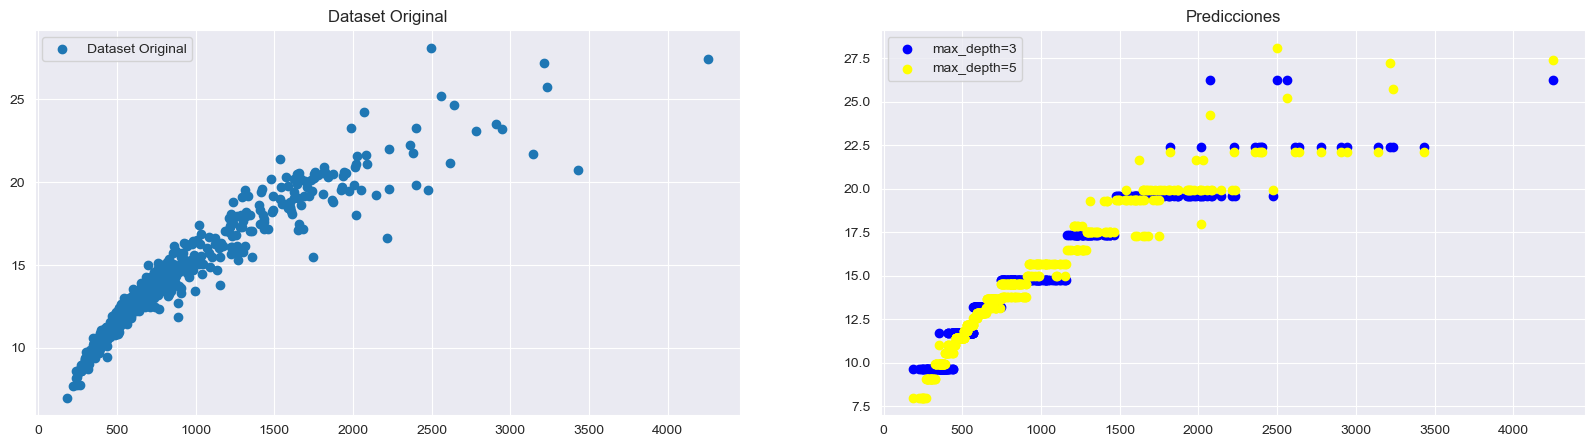

In [127]:
figs, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].scatter(X[:,0], y, label='Dataset Original')
axs[0].set_title('Dataset Original')
axs[0].legend()

axs[1].scatter(X[:,0], y_pred1, c='blue',label='max_depth=3')
axs[1].scatter(X[:,0], y_pred2, c='yellow',label='max_depth=5')
# axs[1].scatter(X[:,0], y_pred3, c='red',label='max_depth=None')
axs[1].legend()
axs[1].set_title('Predicciones')
plt.show()

In [128]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()

model = GridSearchCV(dt, param_grid={'max_depth': [3, 5, 10, 20, 50, 100]}, cv=5)
model.fit(X, y)
print(model.best_params_)

{'max_depth': 5}


In [129]:
# Metricas

from sklearn import metrics as ms

ms.metrics

AttributeError: module 'sklearn.metrics' has no attribute 'metrics'